# BREAST CANCER DATA ANALYSIS

Breast cancer is the second most common cancer among women in the United States (some kinds of skin cancer are the most common). About 1 in 8 U.S. women (about 12%) will develop invasive breast cancer over the course of her lifetime.
In 2020, an estimated 276,480 new cases of invasive breast cancer are expected to be diagnosed in women in the U.S., along with 48,530 new cases of non-invasive (in situ) breast cancer.

In [1]:
#Read data from CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
breastCancer_data = pd.read_csv("BreastCancercsv.csv", header =0)

In [3]:
breastCancer_data.head()

,id,diagnosis,Cancer,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Attribute Information:**   
1) ID number  
2) Diagnosis (M = malignant, B = benign)  
3-32)  

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)   
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

**Information from : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29*

In [4]:
breastCancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
Cancer                     569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-n

### DATA CLEANING PROCESS

In [5]:
#Drop columns 'id', 'Unnamed: 32' columns and display dataframe
breastCancer_data.drop(['id'], axis = 1, inplace = True)

In [6]:
breastCancer_data.head()

,diagnosis,Cancer,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Cancer is a binary column where if Diagnosis = M, Cancer = 1 and if Diagnosis = B, Cancer = 0**

**Cancer is our dependant variable as it depends other parameters while other cloumns are independant of each other**

In [7]:
#Number of rows in the dataframe
len(breastCancer_data)

569

In [8]:
#to check missing values
breastCancer_data.apply(lambda x:sum(x.isnull()/len(x)*100)).sort_values(ascending=False)

fractal_dimension_worst    0.0
symmetry_worst             0.0
Cancer                     0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
diagnosis                  0.0
dtype: f

In [9]:
#Reassigning the target columns
breastCancer_data.describe()

,Cancer,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### DATA VISUALIZATION

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212


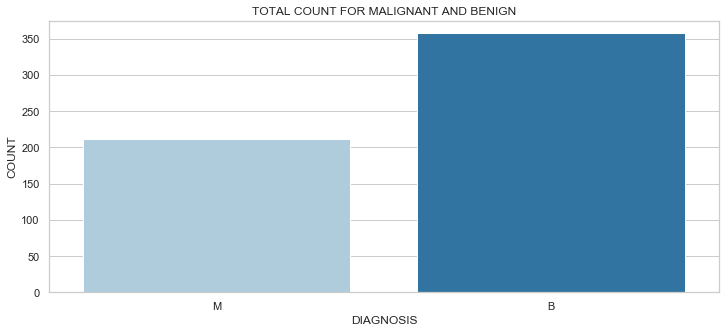

In [10]:
sns.set(style ="whitegrid") 
fig_dims = (12,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_palette(sns.color_palette("Paired"))

# plotting strip plot with seaborn 
# deciding the attributes of dataset on which plot should be made 
sns.countplot(breastCancer_data['diagnosis'])

# count number of obvs in each class
benign, malignant = breastCancer_data['diagnosis'].value_counts()
  
# giving title to the plot 
plt.title('TOTAL COUNT FOR MALIGNANT AND BENIGN')
plt.xlabel('DIAGNOSIS'); plt.ylabel('COUNT')

print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
# function to show plot 
plt.show() 

Out of the 569 observations, 357 have been labeled malignant, while the rest 212 have been labeled benign.

Scanning for any interesting patterns between all "mean" columns and the response variable by generating a scatter plot matrix as shown below:

Text(0.5, 1, 'SCATTER PLOT WITH ALL MEAN COLUMNS')

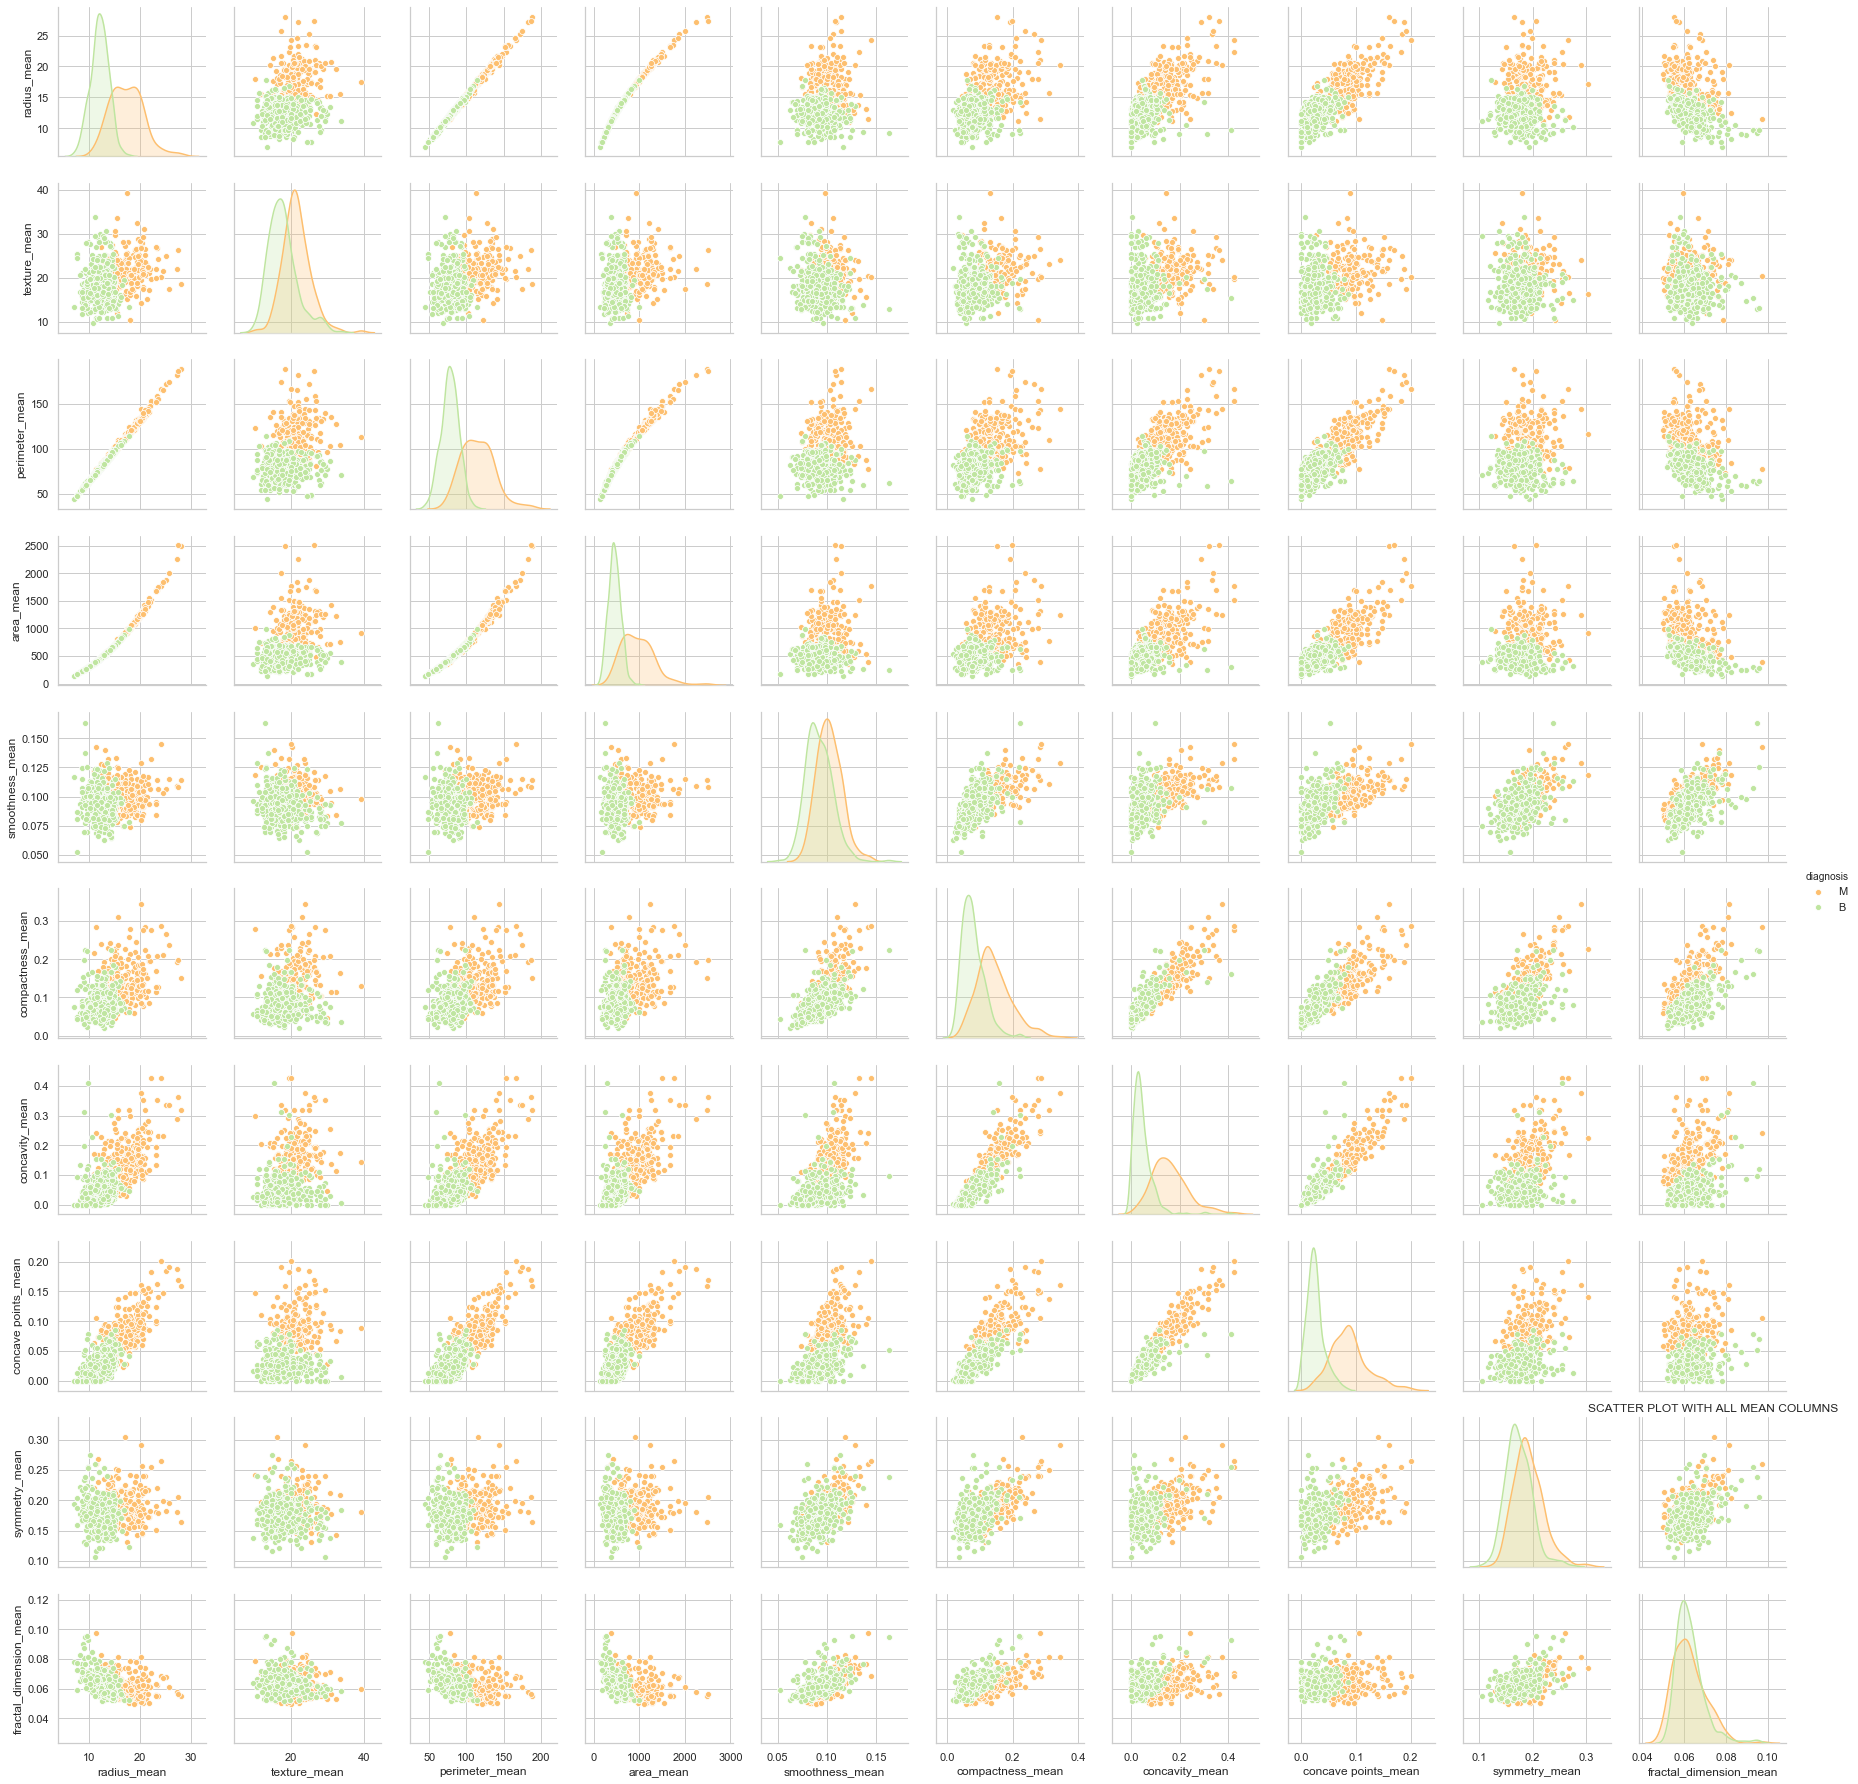

In [11]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=breastCancer_data[cols], hue='diagnosis', palette='Spectral')
plt.title('SCATTER PLOT WITH ALL MEAN COLUMNS')

From the above scatter plot we can see almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables.

In [12]:
all_mean= list(breastCancer_data.columns[1:11])

In [13]:
all_mean

['Cancer',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']

Creating a correlation matrix with all variables:

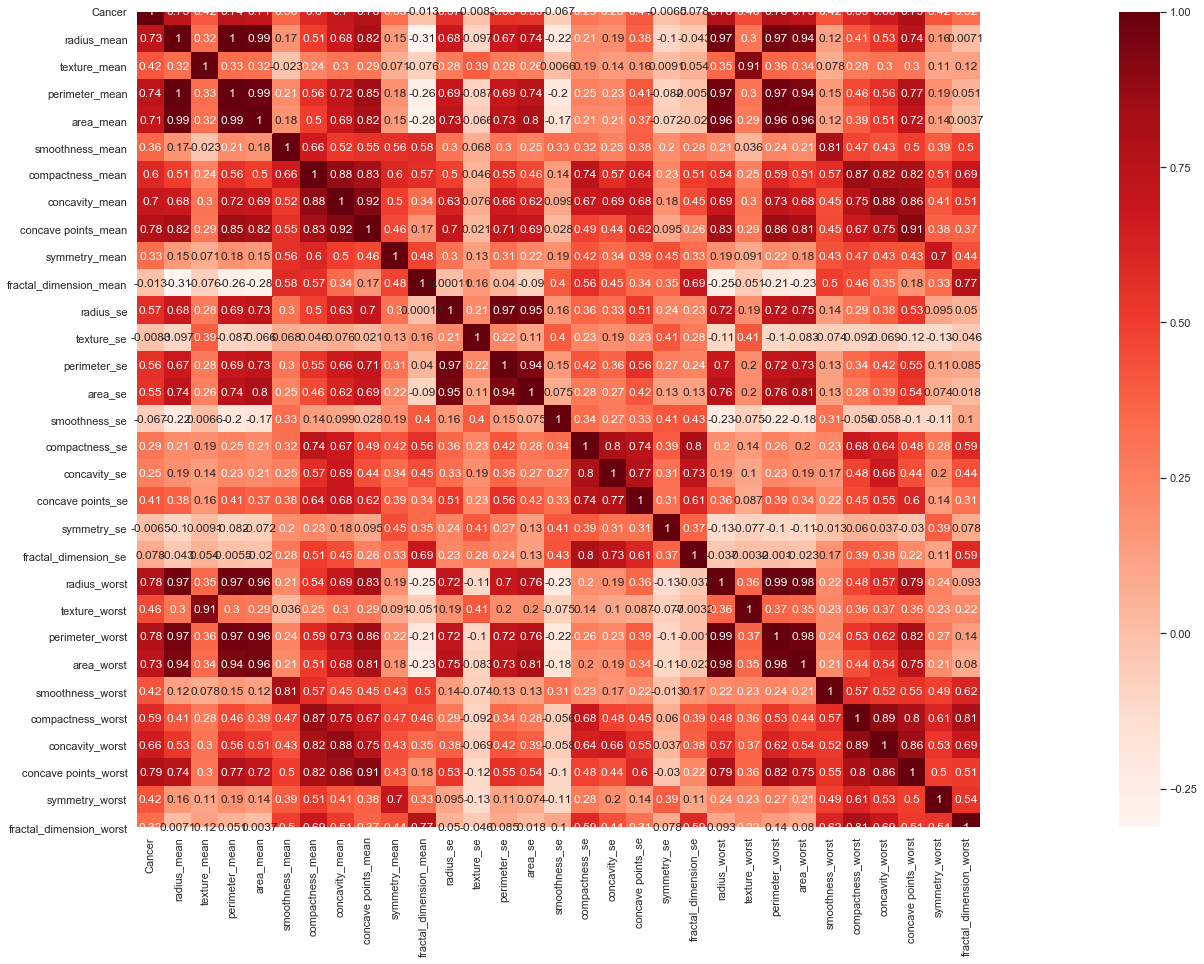

In [14]:
plt.figure(figsize=(50,15))
sns.heatmap(breastCancer_data.corr(), annot=True, square=True, cmap='Reds')
plt.show()

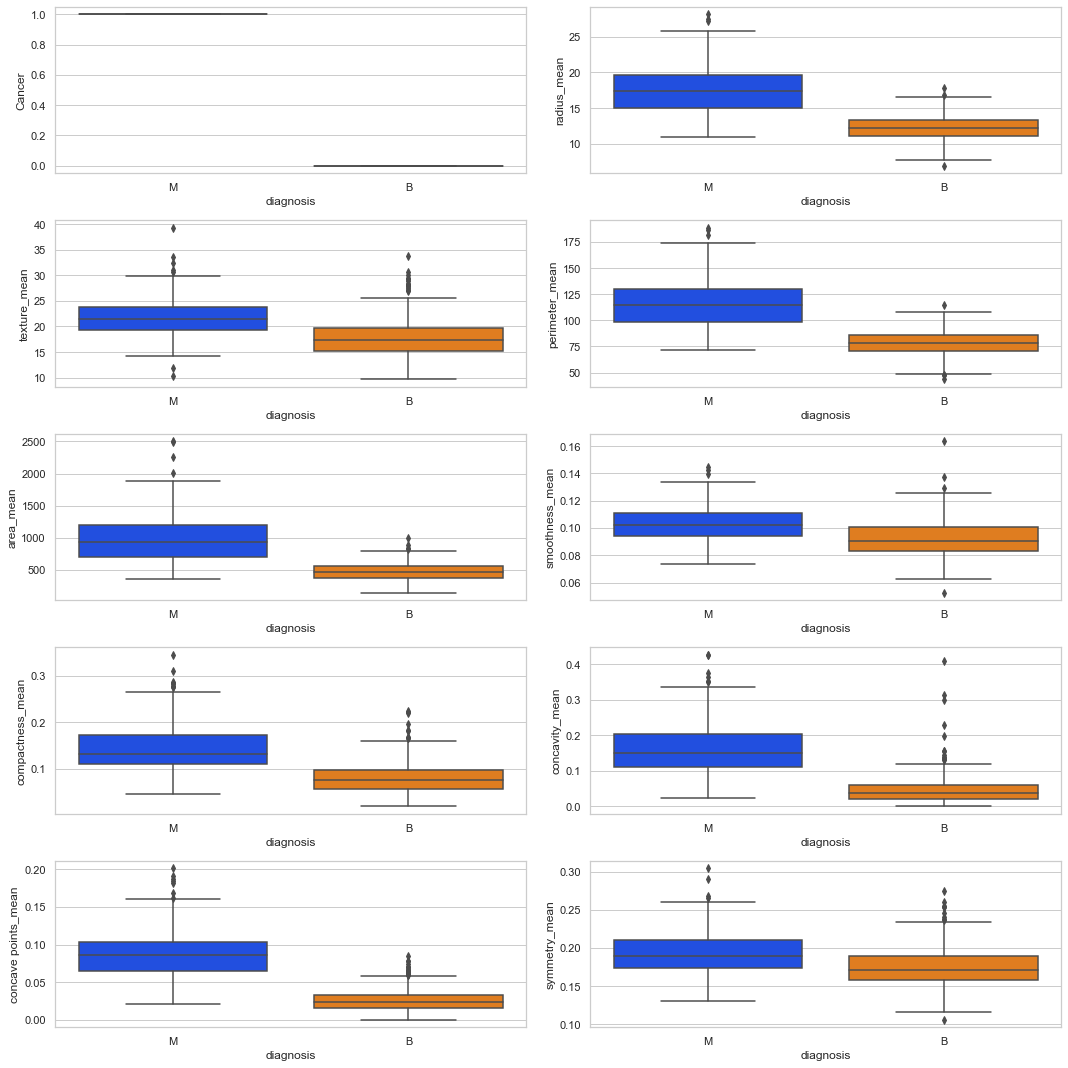

In [15]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(all_mean):
    rows = int(len(all_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=breastCancer_data, palette="bright")

plt.tight_layout()
plt.show()

From the above heatmap we can see that the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This tells us that they has same relationship with each other. 

**Modeling**

In [16]:
breastCancer_data['Cancer'].value_counts()

0    357
1    212
Name: Cancer, dtype: int64

In [17]:
breastCancer_data1 = breastCancer_data.drop(['diagnosis'], axis = 1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = breastCancer_data1.drop(['Cancer'], axis = 1)
Y = breastCancer_data1['Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 70% training and 30% test

In [20]:
train = pd.concat([X_train,y_train] , axis = 1)
valid = pd.concat([X_test, y_test], axis = 1)

In [21]:
train['Cancer'].value_counts()

0    285
1    170
Name: Cancer, dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
train_sc1 = pd.DataFrame(train_sc , columns = train.columns.values)
valid_sc = sc.transform(valid)
valid_sc1 = pd.DataFrame(valid_sc , columns = train.columns.values)

In [23]:
train_sc1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cancer
0,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.470707,0.229620,0.122711,0.113397,0.108561,0.080329,0.187579,0.191276,0.063359,0.280356,0.066286,0.084339,0.467805,0.356876,0.436725,0.286030,0.508684,0.380196,0.282137,0.678351,0.355038,0.319306,1.0
1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.188750,0.232766,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.115558,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.195155,0.341880,0.558419,0.189639,0.230967,1.0
2,0.095556,0.158607,0.086863,0.043606,0.157263,0.036133,0.008625,0.017256,0.367677,0.397495,0.021503,0.208805,0.018235,0.005579,0.192950,0.019760,0.009295,0.065770,0.251704,0.043468,0.062931,0.214552,0.052244,0.024651,0.181206,0.027487,0.012581,0.047732,0.338641,0.244459,0.0
3,0.247480,0.148123,0.241794,0.135101,0.256838,0.180510,0.160239,0.125944,0.295960,0.248297,0.054865,0.104027,0.063139,0.024576,0.091512,0.210352,0.109697,0.205910,0.139330,0.128767,0.184988,0.193763,0.185467,0.084718,0.207555,0.236995,0.262906,0.314089,0.264021,0.353678,0.0
4,0.253632,0.177207,0.238408,0.138112,0.308658,0.080762,0.049414,0.102087,0.258081,0.150297,0.097182,0.121022,0.086934,0.043609,0.203590,0.046858,0.033005,0.195113,0.290458,0.018559,0.186766,0.128731,0.167837,0.085504,0.222083,0.044091,0.042060,0.164708,0.173954,0.048506,0.0


In [24]:
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cancer
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,0.4537,0.8733,3.061,49.810,0.007231,0.027720,0.025090,0.014800,0.01414,0.003336,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,1
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0.1746,1.3050,1.144,9.789,0.007389,0.004883,0.003681,0.003472,0.02701,0.002153,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,0
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,0.2666,0.8309,2.097,19.960,0.004405,0.030260,0.043440,0.010870,0.01921,0.004622,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824,0
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,0.3833,0.9078,2.602,30.150,0.007702,0.008491,0.013070,0.010300,0.02970,0.001432,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,0


## Checking which model will be best fit for data using K-Fold Cross Validation

**K-Fold CrosssValidation**

<br />
<center>
<img src="ipynb.images/kfold.png" width=1000 />
</center>

Train/test split has a lurking danger if the split isn't random and when one subset of our data has only observations from one class, i.e. our data are imbalanced. This will result in overfitting. To avoid this, cross validation is applied. There are several cross validation methods such as K-Fold and Stratified K-Fold.

In K-Fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is the increased accuracy because all observations are used for both training
and validation, and each observation is used for validation exactly once.

If the original data comes in some sort of sorted shape, a shuffle of the order of the data points is necessary before splitting them up into folds. This can be done in KFold(), setting the shuffle parameter to True. If there are concerns about class imbalance, then the StratifiedKFold() class should be used instead. Where KFold() assigns points to folds without attention to output class, StratifiedKFold() assigns data points to folds so that each fold has approximately the same number of data points of each output class. This is most useful for when we have imbalanced numbers of data points in the outcome classes (e.g. one is rare compared to the others). For this class as well, it can be used shuffle=True to shuffle the data points' order before splitting into folds.

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)

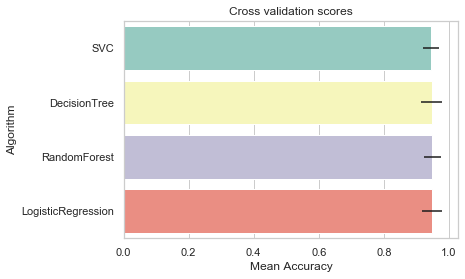

In [26]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_sc1.drop(['Cancer'],axis = 1), y = train_sc1['Cancer'], scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree",
"RandomForest","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

**All the models show good results for our sample data**

In [27]:
X_train = train_sc1.drop(['Cancer'],axis = 1)
y_train = train_sc1['Cancer']

X_test = valid_sc1.drop(['Cancer'],axis = 1)
y_test = valid_sc1['Cancer']

## Building different prediction models

In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


**Fixing train and test datasets**
**Do not run the below cells again, as train and test are now stationary**

In [242]:
#dfxtr = pd.DataFrame(X_train) 
  
#dfxtr.to_csv('X_train.csv') 

In [243]:
#dfytr = pd.DataFrame(y_train) 

#dfytr.to_csv('Y_train.csv') 

In [244]:
#dfxte = pd.DataFrame(X_test) 
  
#dfxte.to_csv('X_test.csv') 

In [245]:
#dfyte = pd.DataFrame(y_test) 

#dfyte.to_csv('Y_test.csv') 

In [20]:
dfxtr1 = pd.read_csv('X_train.csv')
dfxtr1 = dfxtr1.drop(['Unnamed: 0'],axis = 1)

In [21]:
dfytr1 = pd.read_csv('Y_train.csv')
dfytr1 = dfytr1.drop(['Unnamed: 0'],axis = 1)

In [22]:
dfxte1 = pd.read_csv('X_test.csv')
dfxte1 = dfxte1.drop(['Unnamed: 0'],axis = 1)

In [23]:
dfyte1 = pd.read_csv('Y_test.csv')
dfyte1 = dfyte1.drop(['Unnamed: 0'],axis = 1)

**Decision Tree**

<br />
<center>
<img src="ipynb.images/decisiontree.jpeg" width=400 />
</center>

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

**Confusion Matrix**

<br />
<center>
<img src="ipynb.images/confusion.png" width=500 />
</center>

In [419]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced').fit(dfxtr1, dfytr1)
preds = clf.predict(dfxtr1)

In [420]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[285,   0],
       [  0, 170]])

In [421]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       285
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [422]:
preds = clf.predict(dfxte1)

In [423]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

array([[68,  4],
       [ 8, 34]])

In [272]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        72
         1.0       0.92      0.79      0.85        42

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



**Support Vector Machine**

<center>
<img src="ipynb.images/svm.png" width=500 />
</center>

At first approximation what SVMs do is to find a separating line(or hyperplane) between data of two classes. SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

In [291]:
from sklearn.svm import SVC
svm = SVC(class_weight = 'balanced')
svm.fit(dfxtr1, dfytr1)
preds=svm.predict(dfxtr1)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [292]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[281,   4],
       [ 16, 154]])

In [293]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       285
         1.0       0.97      0.91      0.94       170

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



In [294]:
preds = svm.predict(dfxte1)

In [295]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

array([[71,  1],
       [ 5, 37]])

In [296]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        72
         1.0       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



**Random Forest**

<center>
<img src="ipynb.images/rf.png" width=500 />
</center>

From Decision Tree to Random Forest

Why exactly is a random forest better than a single decision tree? We can think about it terms of having hundreds of humans make estimates for the max temperature problem: by pooling predictions, we can incorporate much more knowledge than from any one individual.

Why the name ‘random forest?’ Well, much as people might rely on different sources to make a prediction, each decision tree in the forest considers a random subset of features when forming questions and only has access to a random set of the training data points. This increases diversity in the forest leading to more robust overall predictions and the name ‘random forest.’ When it comes time to make a prediction, the random forest takes an average of all the individual decision tree estimates.

The other class of problems is known as classification, where the targets are a discrete class label such as cloudy or sunny. In that case, the random forest will take a majority vote for the predicted class).

In [354]:
#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100,class_weight ='balanced')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(dfxtr1,dfytr1)

preds=clf1.predict(dfxtr1)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [355]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[285,   0],
       [  0, 170]])

In [356]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       285
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [357]:
preds = clf1.predict(dfxte1)

In [358]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

array([[72,  0],
       [ 5, 37]])

In [359]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        72
         1.0       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



**Logistic Regression**

It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.
E.g. When we have to predict if a student passes or fails in an exam when the number of hours spent studying is given as a feature, the response variable has two values, pass and fail.

In [27]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(dfxtr1, dfytr1)
preds = logreg.predict(dfxtr1)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[276,   9],
       [  3, 167]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       285
         1.0       0.95      0.98      0.97       170

    accuracy                           0.97       455
   macro avg       0.97      0.98      0.97       455
weighted avg       0.97      0.97      0.97       455



In [30]:
preds = logreg.predict(dfxte1)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

array([[72,  0],
       [ 5, 37]])

In [418]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        72
         1.0       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



**Of the various models, Logistic Regression and Random Forest show the most accuracy.**

**Interpreting Logistic Regression**

In [32]:
logreg.intercept_

array([-5.22161207])

In [303]:
importance = pd.DataFrame(logreg.coef_, columns = dfxtr1.columns.values)

In [305]:
importance

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.780347,0.760469,0.852533,1.048905,-0.387743,0.474105,1.810258,2.266373,-0.518941,-1.431234,1.074203,-0.359242,0.821636,0.799124,-0.258056,-0.594846,-0.231486,-0.054193,-0.413051,-0.645877,1.723782,1.397449,1.600444,1.527196,0.62417,0.813214,1.454675,2.4033,0.757886,0.189914


Logistic Regression creates line y=mx+c for n dimensions, where n = no. of independent variables  
The o/p of above model (y = m1x1 + m2x2... + c)is Odds,  Odds = p/1-p where p = probablity of having cancer
Therefore if p > 0.5, person will have cancer and p< 0.5 the person will not have cancer

<Figure size 936x720 with 0 Axes>

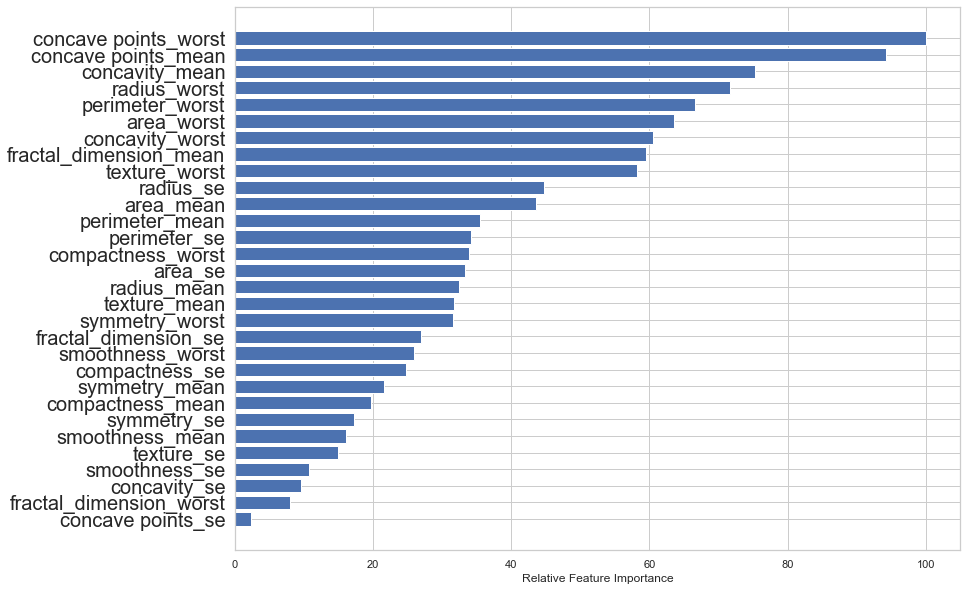

In [332]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
plt.clf()
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(dfxtr1.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.yticks(fontsize=20)
plt.show()

<Figure size 936x720 with 0 Axes>

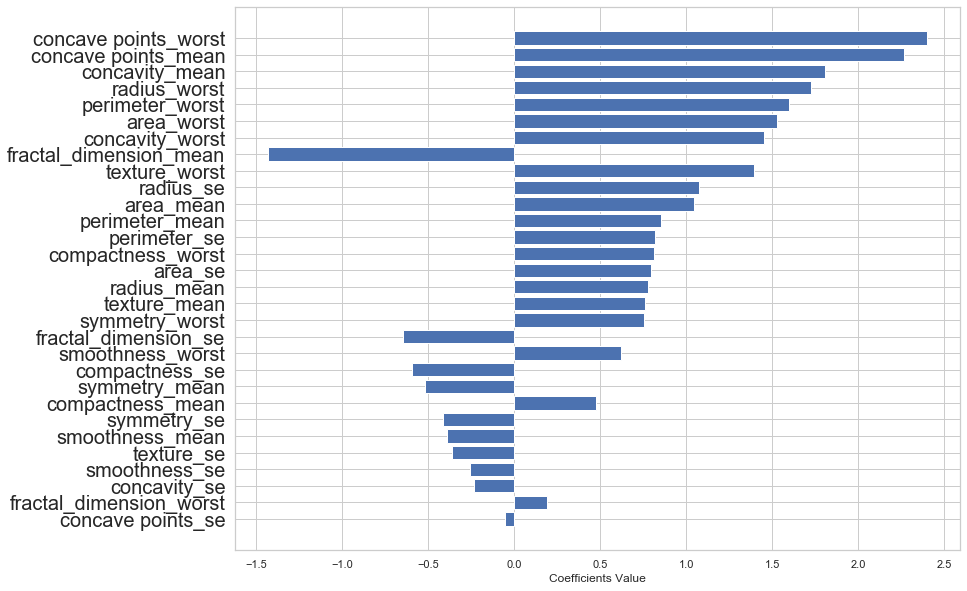

In [335]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
plt.clf()
feature_importance = logreg.coef_[0]
sort_help = abs(logreg.coef_[0])
sorted_idx = np.argsort(sort_help)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(dfxtr1.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Coefficients Value')

plt.yticks(fontsize=20)
plt.show()

**Random Forest**

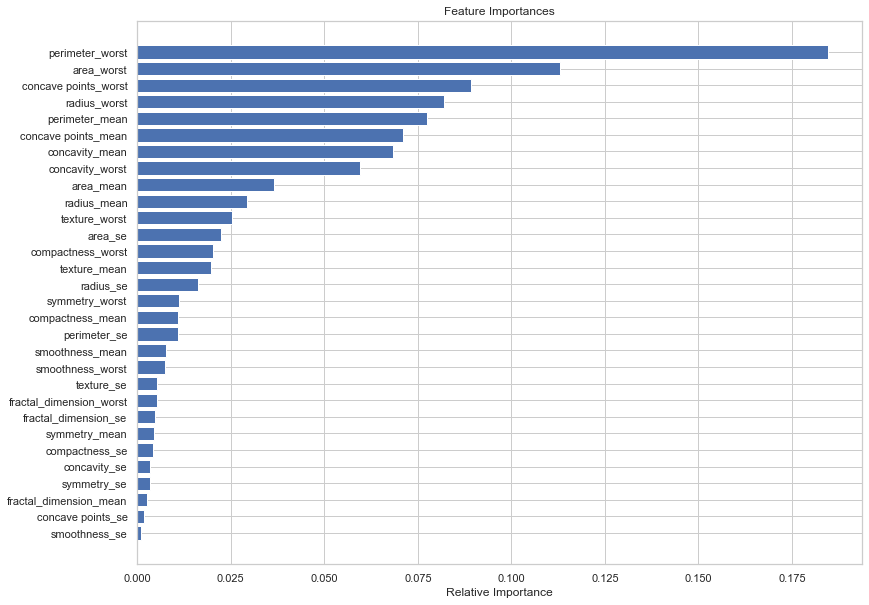

In [360]:
features = dfxtr1.columns.values
importances = clf1.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Trying Feature-Selection**

In [434]:
dfxtr2 = dfxtr1.drop([ 'texture_mean', 'smoothness_mean', 'compactness_mean', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'smoothness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],axis = 1)

In [436]:
dfxte2 = dfxte1.drop([ 'texture_mean', 'smoothness_mean', 'compactness_mean', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'smoothness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],axis = 1)

In [437]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(dfxtr2, dfytr1)
preds = logreg.predict(dfxtr2)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [438]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[274,  11],
       [  5, 165]])

In [439]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       285
         1.0       0.94      0.97      0.95       170

    accuracy                           0.96       455
   macro avg       0.96      0.97      0.96       455
weighted avg       0.97      0.96      0.96       455



In [440]:
preds = logreg.predict(dfxte2)

In [441]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

array([[70,  2],
       [ 5, 37]])

In [442]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        72
         1.0       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



**Decision Tree**

In [444]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced').fit(dfxtr2, dfytr1)
preds = clf.predict(dfxtr2)

In [420]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[285,   0],
       [  0, 170]])

In [445]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       285
         1.0       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [447]:
preds = clf.predict(dfxte2)

In [448]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

array([[65,  7],
       [ 5, 37]])

In [449]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        72
         1.0       0.84      0.88      0.86        42

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



**Support Vector Machine**

In [467]:
from sklearn.svm import SVC
svm = SVC(class_weight = 'balanced')
svm.fit(dfxtr2, dfytr1)
preds=svm.predict(dfxtr2)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


In [468]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfytr1, preds)

array([[279,   6],
       [ 14, 156]])

In [469]:
from sklearn.metrics import classification_report
print(classification_report(dfytr1, preds))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       285
         1.0       0.96      0.92      0.94       170

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



In [470]:
preds = svm.predict(dfxte2)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dfyte1, preds)

In [472]:
from sklearn.metrics import classification_report
print(classification_report(dfyte1, preds))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        72
         1.0       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



We tried feature-selection to better the models' runtime and improve the accuracy of models based on Random Forest feature importance. However, it did not improve the performance of the model.

### Conclusion:

The models providing best results for our dataset are `Logistic Regression` and `Random Forest`.
The top five parameters that mainly affect Logistic Regression model are : `concave points_worst, concave points_mean, concavity_mean, radius_worst, perimeter_worst`. These are the relative positive features, meaning higher the coeffecient values of these parameters, the greater chances of having cancer.
The relative positive features are : fractal_diemension_mean, fractal_dimension_se. Higher the coefficient values of these parameters, lesser the chances of hvaing cancer

The top five parameters that mainly affect `Random Forest` model are : `permiter_worst, area_worst, concave points_worst,radius_worst, perimeter_mean`.

F1 score of Random Forest and Logistic Regression is .94, precision = 1, recall = .88

### References


  Title     = {Breast Cancer Analysis and Prediction},
  url       = "https://www.kaggle.com/vincentlugat/breast-cancer-analysis-and-prediction/output"

  Title     = {Understanding Confusion matrix - Towards Data Science},
  url       = "https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62"
  
  Title     = {Logistic Regression Simplified},
  url       =  "https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389"
 
  Title     = {Support Vector Machines(SVM) — An Overview},
  url       = https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
 
  Title     = {Random Forest Simple Explanation},
  url       = https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d
